In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [4]:
# Load the MNIST dataset
file_path = "/content/MNIST_Subset.h5"
with h5py.File(file_path, 'r') as h5file:
    X = np.array(h5file['X'])
    y = np.array(h5file['Y'])

# Reshape and normalize the data
X = X.reshape(X.shape[0], -1)
X = X / 255.0
Y = y.astype(int)  # Sklearn's MLPClassifier uses integer labels

# Split the data into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)



In [5]:

# Model with 1 hidden layer (100 units)
mlp_1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, solver='adam', random_state=42, verbose=True)
mlp_1.fit(X_train, Y_train)

# Model with 3 hidden layers (100, 50, 50 units)
mlp_2 = MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=1000, solver='adam', random_state=42, verbose=True)
mlp_2.fit(X_train, Y_train)


Iteration 1, loss = 0.25868451
Iteration 2, loss = 0.11274469
Iteration 3, loss = 0.08806104
Iteration 4, loss = 0.07369525
Iteration 5, loss = 0.06152351
Iteration 6, loss = 0.05331805
Iteration 7, loss = 0.04567655
Iteration 8, loss = 0.04102510
Iteration 9, loss = 0.03588551
Iteration 10, loss = 0.03172090
Iteration 11, loss = 0.02873615
Iteration 12, loss = 0.02513121
Iteration 13, loss = 0.02437356
Iteration 14, loss = 0.02193871
Iteration 15, loss = 0.01890489
Iteration 16, loss = 0.01719356
Iteration 17, loss = 0.01566041
Iteration 18, loss = 0.01392322
Iteration 19, loss = 0.01329188
Iteration 20, loss = 0.01185711
Iteration 21, loss = 0.01118128
Iteration 22, loss = 0.00987799
Iteration 23, loss = 0.00881626
Iteration 24, loss = 0.00813242
Iteration 25, loss = 0.00758065
Iteration 26, loss = 0.00703263
Iteration 27, loss = 0.00639620
Iteration 28, loss = 0.00607752
Iteration 29, loss = 0.00560668
Iteration 30, loss = 0.00496568
Iteration 31, loss = 0.00454799
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=1000, random_state=42,
              verbose=True)

In [6]:
# Predict and compute accuracy for model with 1 hidden layer
train_predictions_1 = mlp_1.predict(X_train)
val_predictions_1 = mlp_1.predict(X_val)
test_predictions_1 = mlp_1.predict(X_test)

train_accuracy_1 = accuracy_score(Y_train, train_predictions_1)
val_accuracy_1 = accuracy_score(Y_val, val_predictions_1)
test_accuracy_1 = accuracy_score(Y_test, test_predictions_1)

print(f'Accuracy with 1 hidden layer on training set: {train_accuracy_1}')
print(f'Accuracy with 1 hidden layer on validation set: {val_accuracy_1}')
print(f'Accuracy with 1 hidden layer on test set: {test_accuracy_1}')

# Predict and compute accuracy for model with 3 hidden layers
train_predictions_2 = mlp_2.predict(X_train)
val_predictions_2 = mlp_2.predict(X_val)
test_predictions_2 = mlp_2.predict(X_test)

train_accuracy_2 = accuracy_score(Y_train, train_predictions_2)
val_accuracy_2 = accuracy_score(Y_val, val_predictions_2)
test_accuracy_2 = accuracy_score(Y_test, test_predictions_2)

print(f'Accuracy with 3 hidden layers on training set: {train_accuracy_2}')
print(f'Accuracy with 3 hidden layers on validation set: {val_accuracy_2}')
print(f'Accuracy with 3 hidden layers on test set: {test_accuracy_2}')


Accuracy with 1 hidden layer on training set: 1.0
Accuracy with 1 hidden layer on validation set: 0.9894736842105263
Accuracy with 1 hidden layer on test set: 0.9901788846018941
Accuracy with 3 hidden layers on training set: 1.0
Accuracy with 3 hidden layers on validation set: 0.9912280701754386
Accuracy with 3 hidden layers on test set: 0.9912311469659768


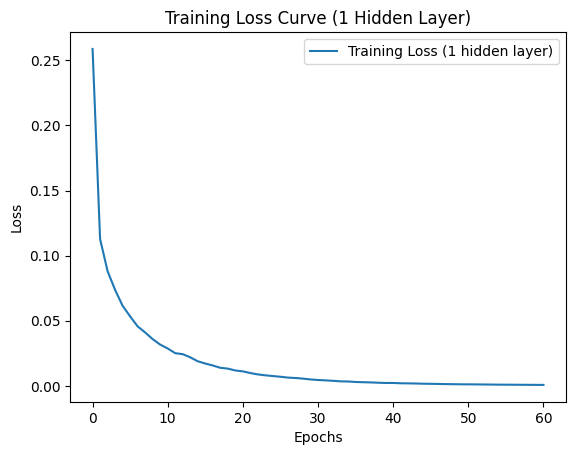

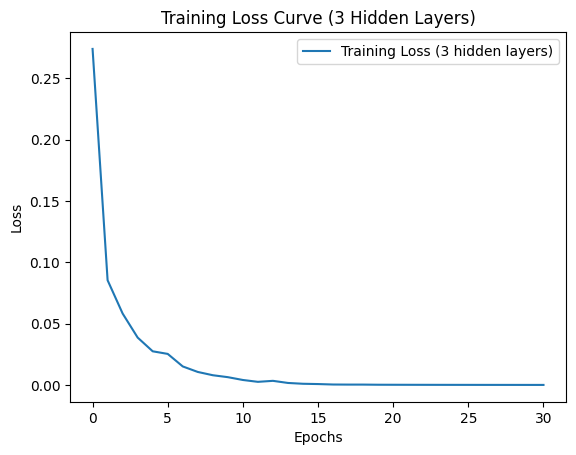

In [7]:
# Plot loss curve for model with 1 hidden layer
plt.plot(mlp_1.loss_curve_, label='Training Loss (1 hidden layer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve (1 Hidden Layer)')
plt.legend()
plt.show()

# Plot loss curve for model with 3 hidden layers
plt.plot(mlp_2.loss_curve_, label='Training Loss (3 hidden layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve (3 Hidden Layers)')
plt.legend()
plt.show()
